In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
# plot inline
%matplotlib inline

df = pd.read_pickle('/home/hermuba/res/data/drug/tmacc_df')
df.drop('ACTIVITY', axis=1, inplace=True)
df.set_index('chem_name', drop=True, append=False, inplace=True)

new_df = df.fillna(0)

norm_df = new_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
norm_df.dropna(axis = 1, inplace = True) # some std = 0, provide no info therefore remove them

In [78]:
anno_abx = pd.read_pickle("/home/hermuba/res/data/drug/anno_abx_class")
color_list = ['maroon', 'firebrick', 'salmon','chocolate', 'goldenrod', 'yellowgreen', 'mediumseagreen', 'forestgreen','royalblue', 'midnightblue', 'indigo', 
             'magenta', 'palevioletred', 'saddlebrown','grey', 'black']

,category,drug,order
81,penicillins,amoxicillin,0.0


In [152]:
lactam_only = norm_df.loc[norm_df.index.isin(anno_abx.loc[anno_abx['order']<5]['drug'])]

In [107]:
def dendro_with_class(df):
    plt.figure(figsize=(25, 10))
    dendrogram(linkage(df), labels = df.index, orientation = 'top', leaf_font_size = 20)
    ax = plt.gca() 
    x_tick = ax.get_xticks()
    
    x_labels = ax.get_xmajorticklabels()
    for i in range(len(x_labels)):
        drug_name = x_labels[i].get_text()

        order = int(anno_abx.loc[anno_abx['drug']== drug_name]['order'])

        c = color_list[order]

        circ = plt.Circle((x_tick[i], -30), radius = 3, color = c, clip_on = False)
        ax.add_patch(circ)



In [117]:
sorted_index = anno_abx.loc[anno_abx['drug'].isin(list(df.index))].sort_values(by= 'order')['drug']

In [101]:
def color_map(df):
    m = df.as_matrix()
    plt.figure(figsize = (20,30))
    m = np.ma.masked_where(np.isnan(m),m)
    plt.pcolor(m, cmap='rainbow', vmin=1, vmax=5)
    plt.xticks(np.arange(0.5, len(sub_matrix.columns), 1), df.columns, rotation = 90)
    plt.yticks(np.arange(0.5, len(sub_matrix.index), 1), df.index)
    plt.colorbar(orientation='horizontal')
    plt.show()

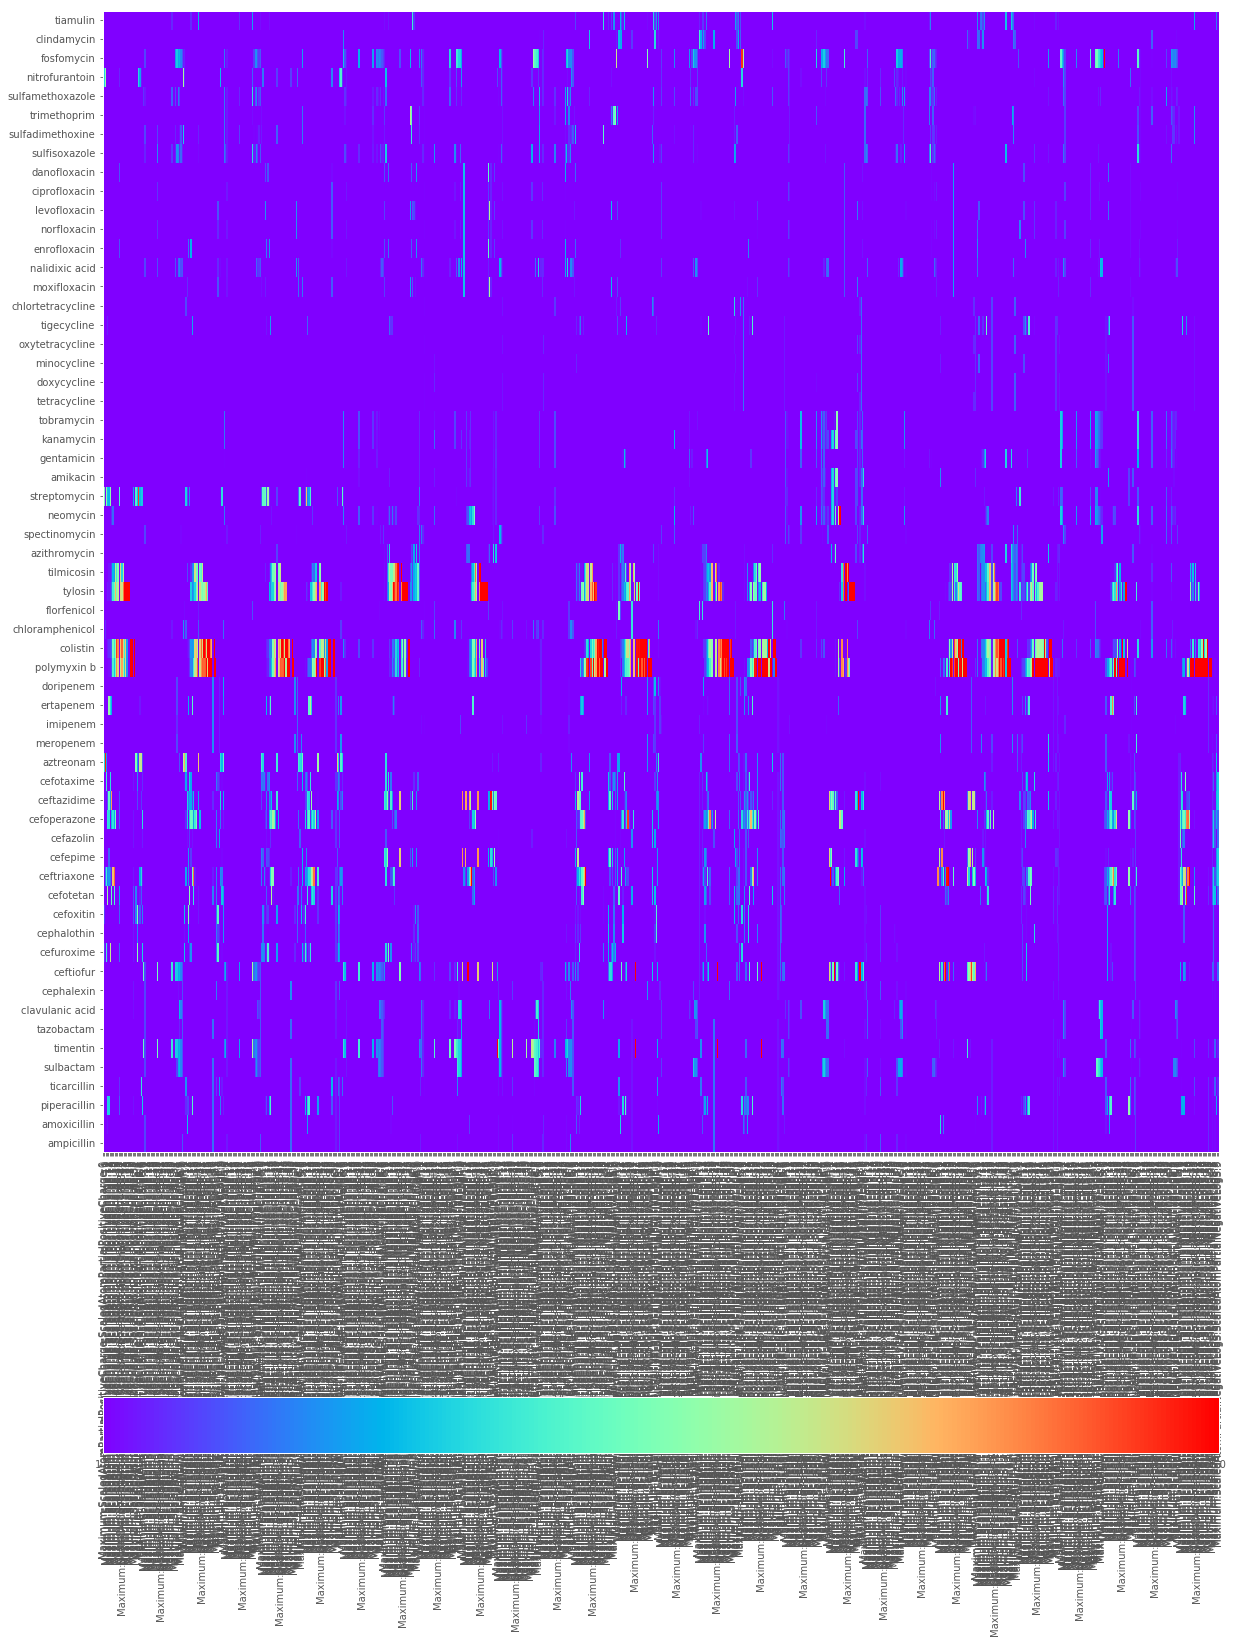

In [120]:
color_map(norm_df.loc[sorted_index, :])

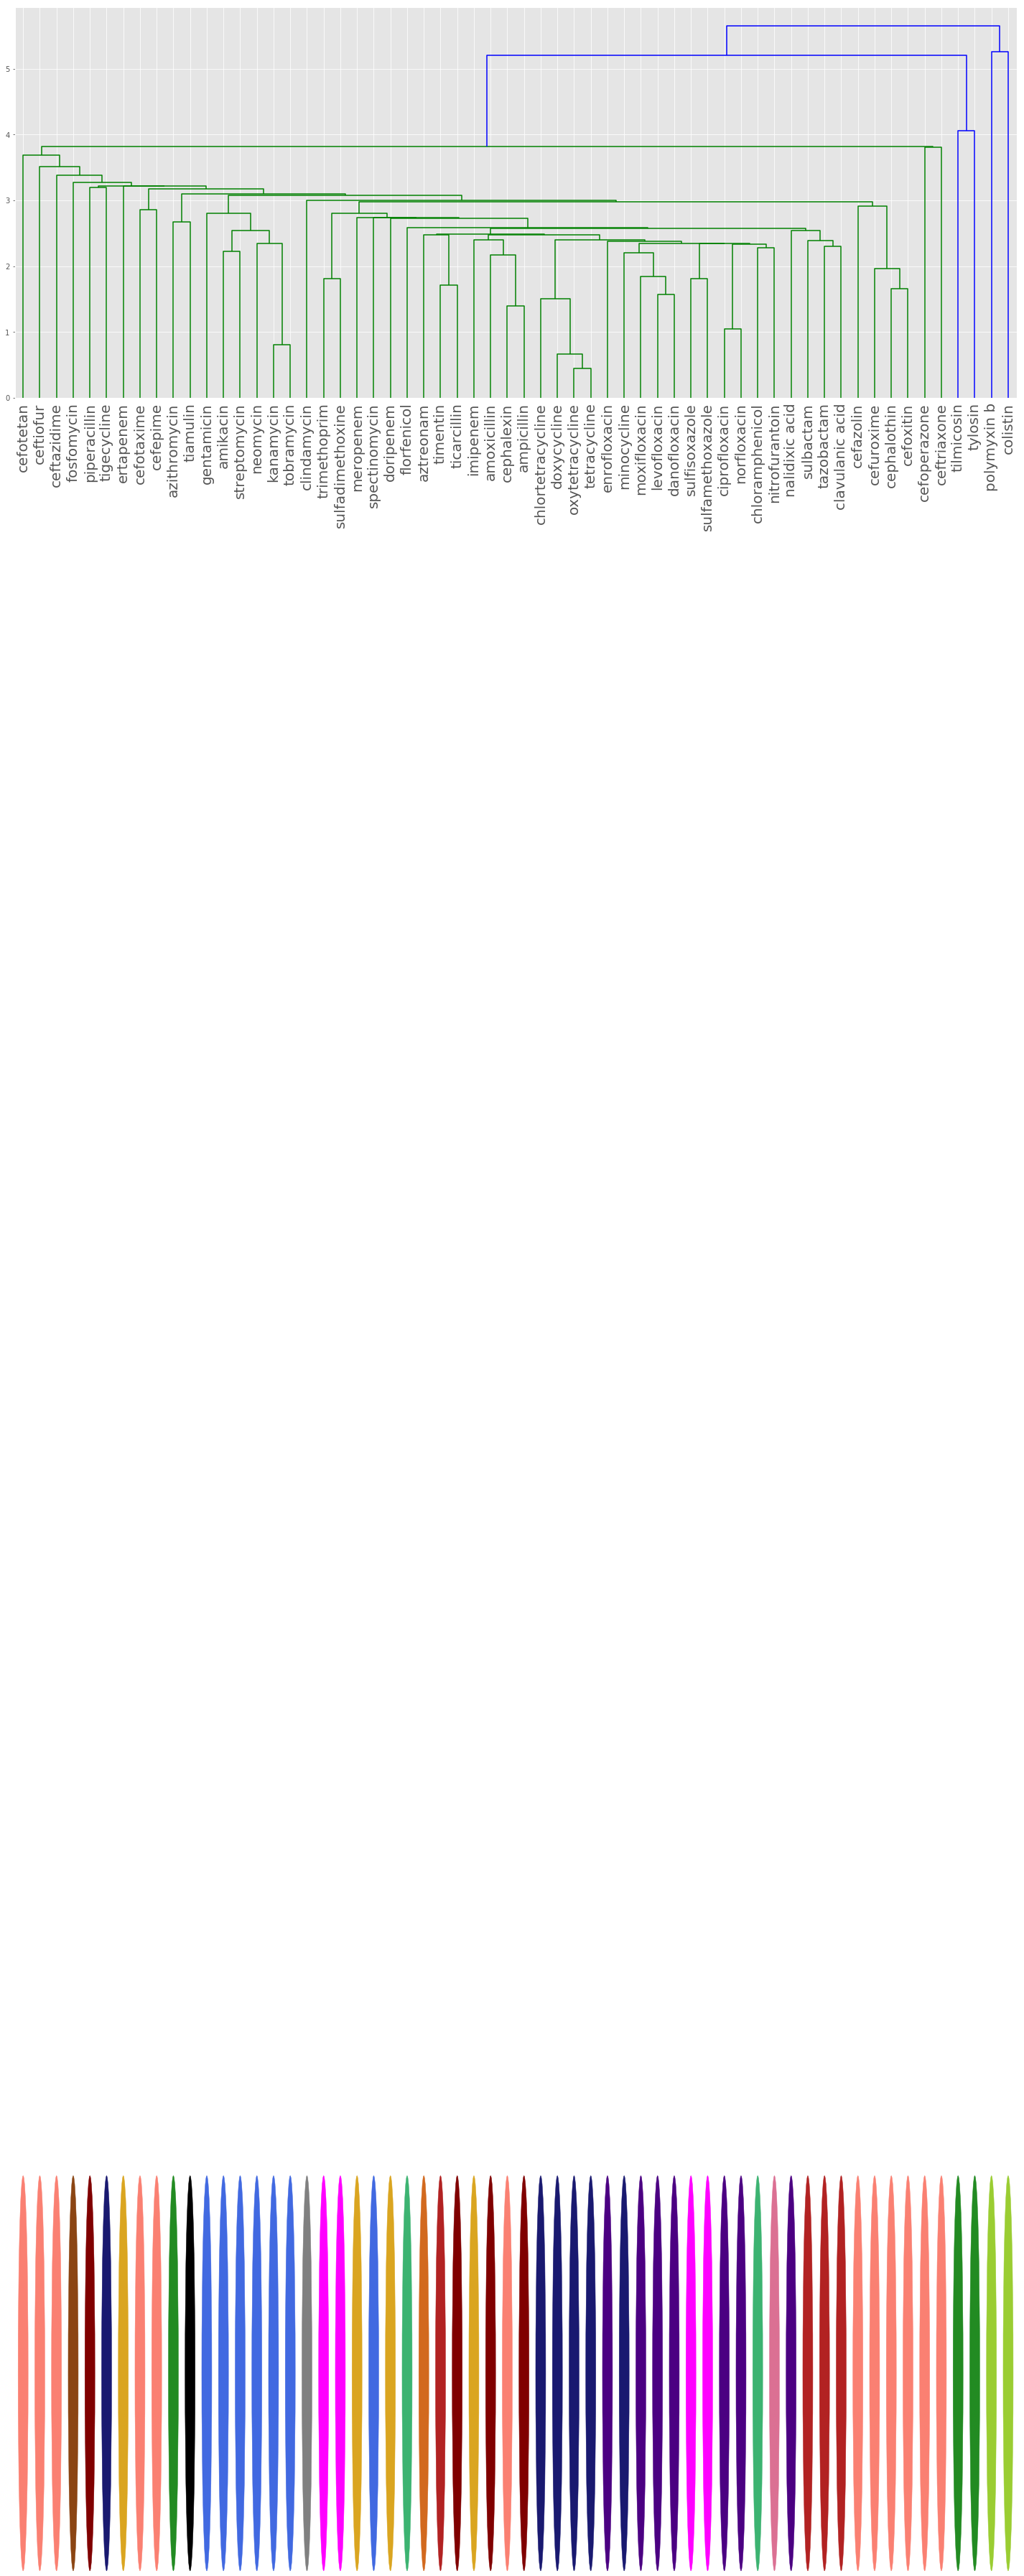

In [106]:
dendro_with_class(df.iloc[:, 1:])

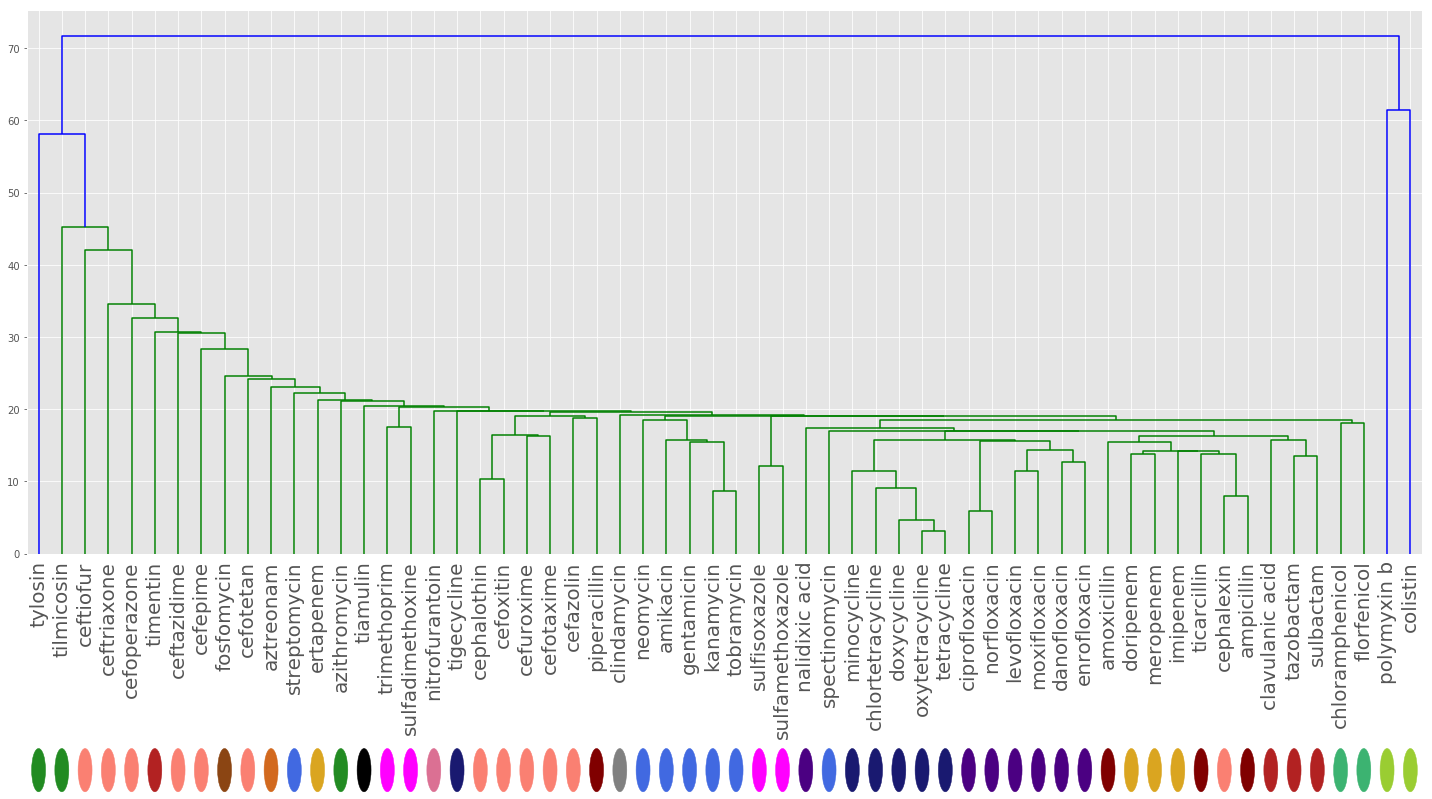

In [105]:
dendro_with_class(norm_df)

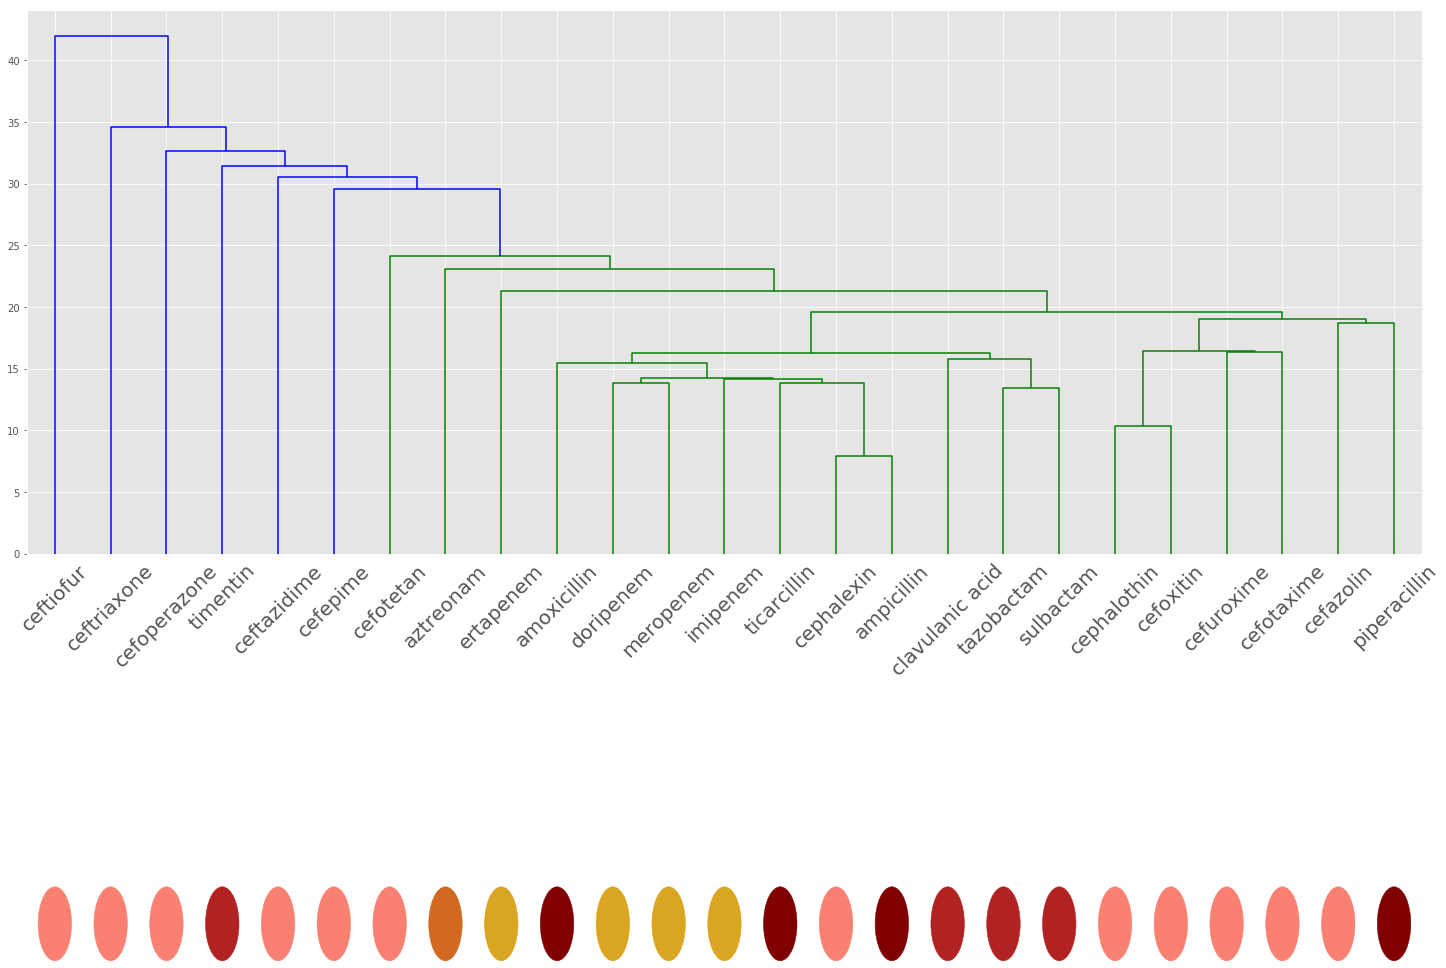

In [153]:
dendro_with_class(lactam_only)

In [129]:
import numpy as np
from sklearn.decomposition import PCA
X = norm_df
pca = PCA(n_components=2)
pca.fit(X)
pc = pca.fit_transform(X, X.index)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[ 0.37122139  0.14842142]
[ 138.11841374   87.3340059 ]


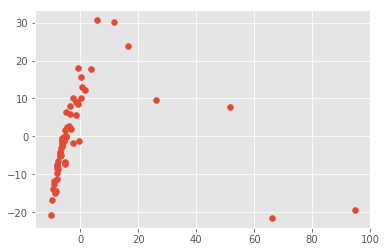

In [142]:
plt.scatter(pc[:,0], pc[:,1], label = X.index)

In [144]:
X = new_df
pca = PCA(n_components=2)
pca.fit(X)
pc = pca.fit_transform(X, X.index)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[  1.00000000e+00   6.32066618e-14]
[  7.23193110e+07   1.81817510e+01]


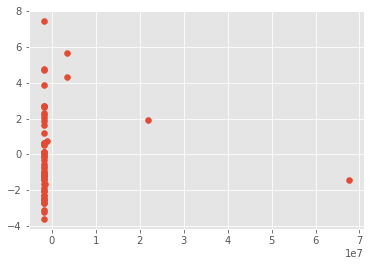

In [145]:
plt.scatter(pc[:,0], pc[:,1], label = X.index)

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

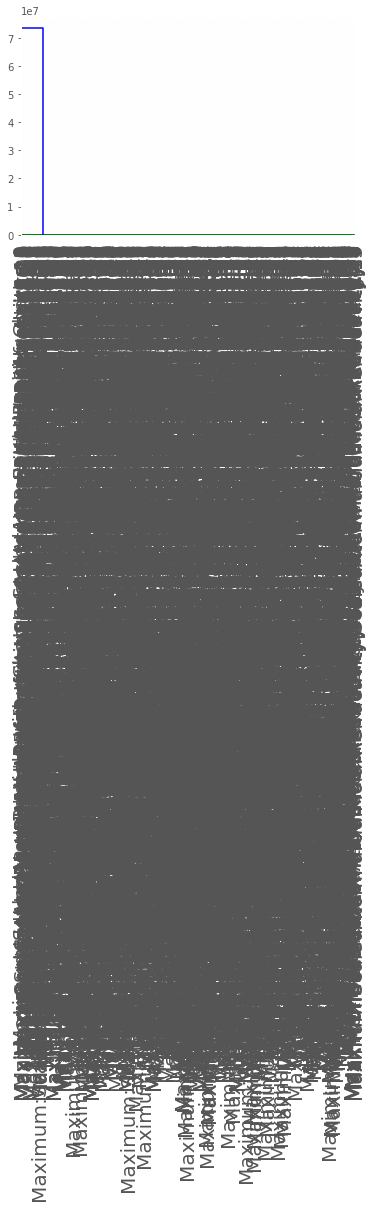

In [156]:
dendrogram(linkage(new_df.transpose()), labels = new_df.transpose().index, orientation = 'top', leaf_font_size = 20)

In [159]:
X = norm_df.transpose()
pca = PCA(n_components=2)
pca.fit(X)
pc = pca.fit_transform(X, X.index)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[ 0.36784127  0.14906974]
[ 137.03331859   87.23498536]


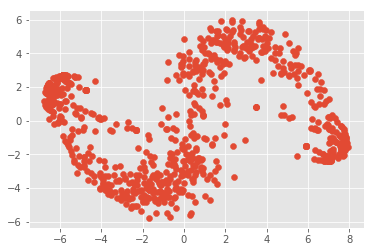

In [160]:
plt.scatter(pc[:,0], pc[:,1], label = X.index)

In [162]:
first = []
snd = []
third = []
four = []
for i in list(df.columns):
    lists = i.split(':')
    first.append(lists[0])
    snd.append(lists[2])
    third.append(lists[2])
    four.append(lists[3])
print(set(first))

{'Maximum'}


In [163]:
print(set(snd))

{'ScaledAtomPartialNegativeLogP', 'ScaledAtomPartialNegativeCharge', 'ScaledAtomPartialMolarRefractivity', 'ScaledAtomPartialPositiveLogS', 'ScaledAtomPartialPositiveLogP', 'ScaledAtomPartialPositiveCharge', 'ScaledAtomPartialNegativeLogS'}


In [164]:
print(set(third))

{'ScaledAtomPartialNegativeLogP', 'ScaledAtomPartialNegativeCharge', 'ScaledAtomPartialMolarRefractivity', 'ScaledAtomPartialPositiveLogS', 'ScaledAtomPartialPositiveLogP', 'ScaledAtomPartialPositiveCharge', 'ScaledAtomPartialNegativeLogS'}


In [167]:
print(len(set(four)))

34


In [ ]:
#C7 取 2 = 21